In [25]:
# Imports
import skimage as sk
from skimage import io
from skimage import feature
from skimage import filters
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_file = "/Users/jake/Desktop/SampleGFP.tif"
img_raw = sk.io.imread(img_file)

In [26]:
def mean_blur(image, disk_size):
    img_meanfilt = np.empty_like(image)
    for i in range(len(image)):
        img_meanfilt[i,:,:] = filters.rank.mean(image[i,:,:], disk(disk_size))
    return img_meanfilt

In [27]:
def median_blur(image, disk_size):
    img_medianfilt = np.empty_like(image)
    for i in range(len(image)):
        img_medianfilt[i,:,:] = filters.rank.median(image[i,:,:], disk(disk_size))
    return img_medianfilt


In [39]:
def gaussian_blur(image, sigma):
    img_gaussian = np.empty_like(image)
    for i in range(len(image)):
        img_gaussian[i,:,:] = filters.gaussian(image[i,:,:], sigma)
    return img_gaussian

In [52]:
med = median_blur(img_raw, 10)
mea = mean_blur(img_raw, 10)
gau = gaussian_blur(img_raw, 10)

/Users/jake/miniconda3/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 13 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)
/Users/jake/miniconda3/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 14 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


In [53]:
gau = gaussian_blur(img_raw, sigmas = 1)

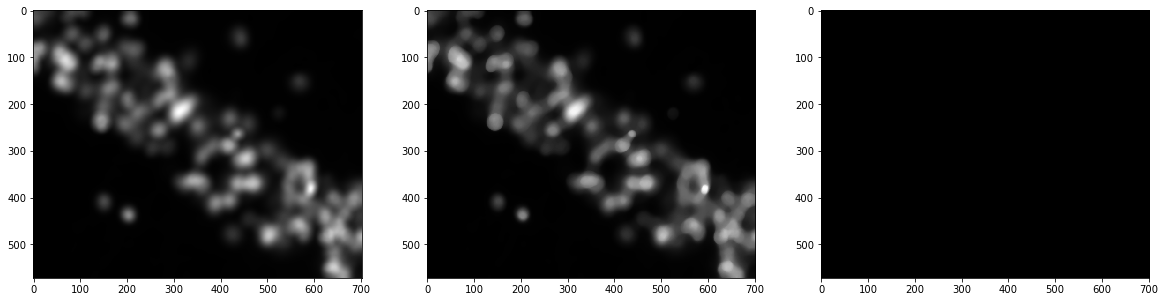

In [54]:
f, ax = plt.subplots(1, 3, figsize = (20,20))
ax[0].imshow(mea[10,:,:], cmap = 'gray')
ax[1].imshow(med[10,:,:], cmap = 'gray')
ax[2].imshow(gau[10,:,:], cmap = 'gray')

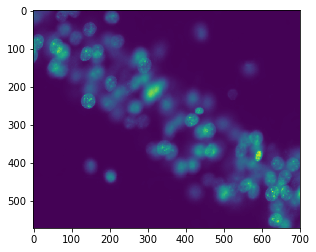

In [57]:
blah = np.zeros_like(img_raw)
for i in range(15):
    blah[i,:,:] = filters.gaussian(img_raw[i,:,:], 5)
plt.imshow(img_raw[10,:,:])